# Project Name: Doctor Consultation Fees Project


About Project: We have data that records important details about a doctor and we have to build a model to predict the doctor’s consultation fee. Where features are Qualification, Experience, Rating etc. and target variable is  Doctor Consultation Fees. 

In [553]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [554]:
#Import Dataset
ds= pd.read_excel('Doctor_Fees_Final_Train.xlsx')
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [555]:
df= pd.DataFrame(data=ds)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [556]:
df.shape

(5961, 7)

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [558]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [559]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [560]:
#Checking for Null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observations: Null values are present in columns Rating , Place and Miscellaneous_Info.               

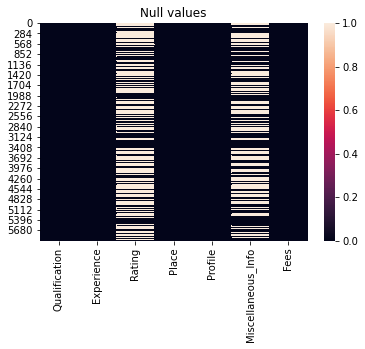

In [561]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Observations: Null values are present in columns Rating , Place and Miscellaneous_Info.

In [562]:
#Splitting Experience column

df['Experience'] = df.Experience.str.split(" ",expand=True,)
df['Experience']= pd.to_numeric(df['Experience'])
df['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int64

In [563]:
print(df['Experience'].dtype)

int64


In [564]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [565]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [566]:
df['Qualification'].value_counts()

BDS                                                                                  488
BHMS                                                                                 477
BAMS                                                                                 471
MBBS                                                                                 334
MBBS, MS - ENT                                                                       220
                                                                                    ... 
MBBS, DNB - Dermatology, Venereology & Leprosy, Fellowship in Aesthetic Medicine       1
MBBS, MS - General Surgery, MCh - Urology, DNB - Urology/Genito - Urinary Surgery      1
MS - General Surgery, Fellow of Academy of General Education (FAGE), MBBS              1
BAMS, MS (Shalyatantra), MSc - Yoga                                                    1
BDS, MDS - Prosthodontics, Fellowship in Implantology                                  1
Name: Qualification, 

In [567]:
# Extract cities

df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [568]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [569]:
# Dealing with  Rating Column
# Replace Nan by -99%,

df['Rating'].fillna('-99%', inplace=True)

In [570]:
# Set dtype to int 

df['Rating']= df['Rating'].str[:-1].astype('int')

In [571]:
#Grouping in bins

bins= [-99,0,10,20,30,40,50,60,70,80,90,100]
labels= [i for i in range(11)]

df['Rating']= pd.cut(df['Rating'], bins= bins, labels= labels, include_lowest=True)
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [572]:
#Will drop Qualification as its Profile decide's doctor's identity and we are not getting proper info

df.drop(["Qualification", 'Miscellaneous_Info'],axis=1,inplace=True)

In [573]:
df.head()

,Experience,Rating,Place,Profile,Fees,City
0,24,10,Kakkanad,Homeopath,100,Ernakulam
1,12,10,Whitefield,Ayurveda,350,Bangalore
2,9,0,Mathikere - BEL,ENT Specialist,300,Bangalore
3,12,0,Bannerghatta Road,Ayurveda,250,Bangalore
4,20,10,Keelkattalai,Ayurveda,250,Chennai


# EDA

In [574]:
df['Place'].value_counts()

HSR Layout           75
Andheri West         70
Dwarka               68
Banjara Hills        64
Mulund West          54
                     ..
Cumballa Hill         1
Pappanaickenpudur     1
Inder Puri            1
Sukhdev Vihar         1
Nayandahalli          1
Name: Place, Length: 867, dtype: int64

In [575]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [576]:
print(df.index[df.City == 'e'])

Int64Index([3980], dtype='int64')


In [577]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

In [578]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  26
Name: City, dtype: int64

In [579]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

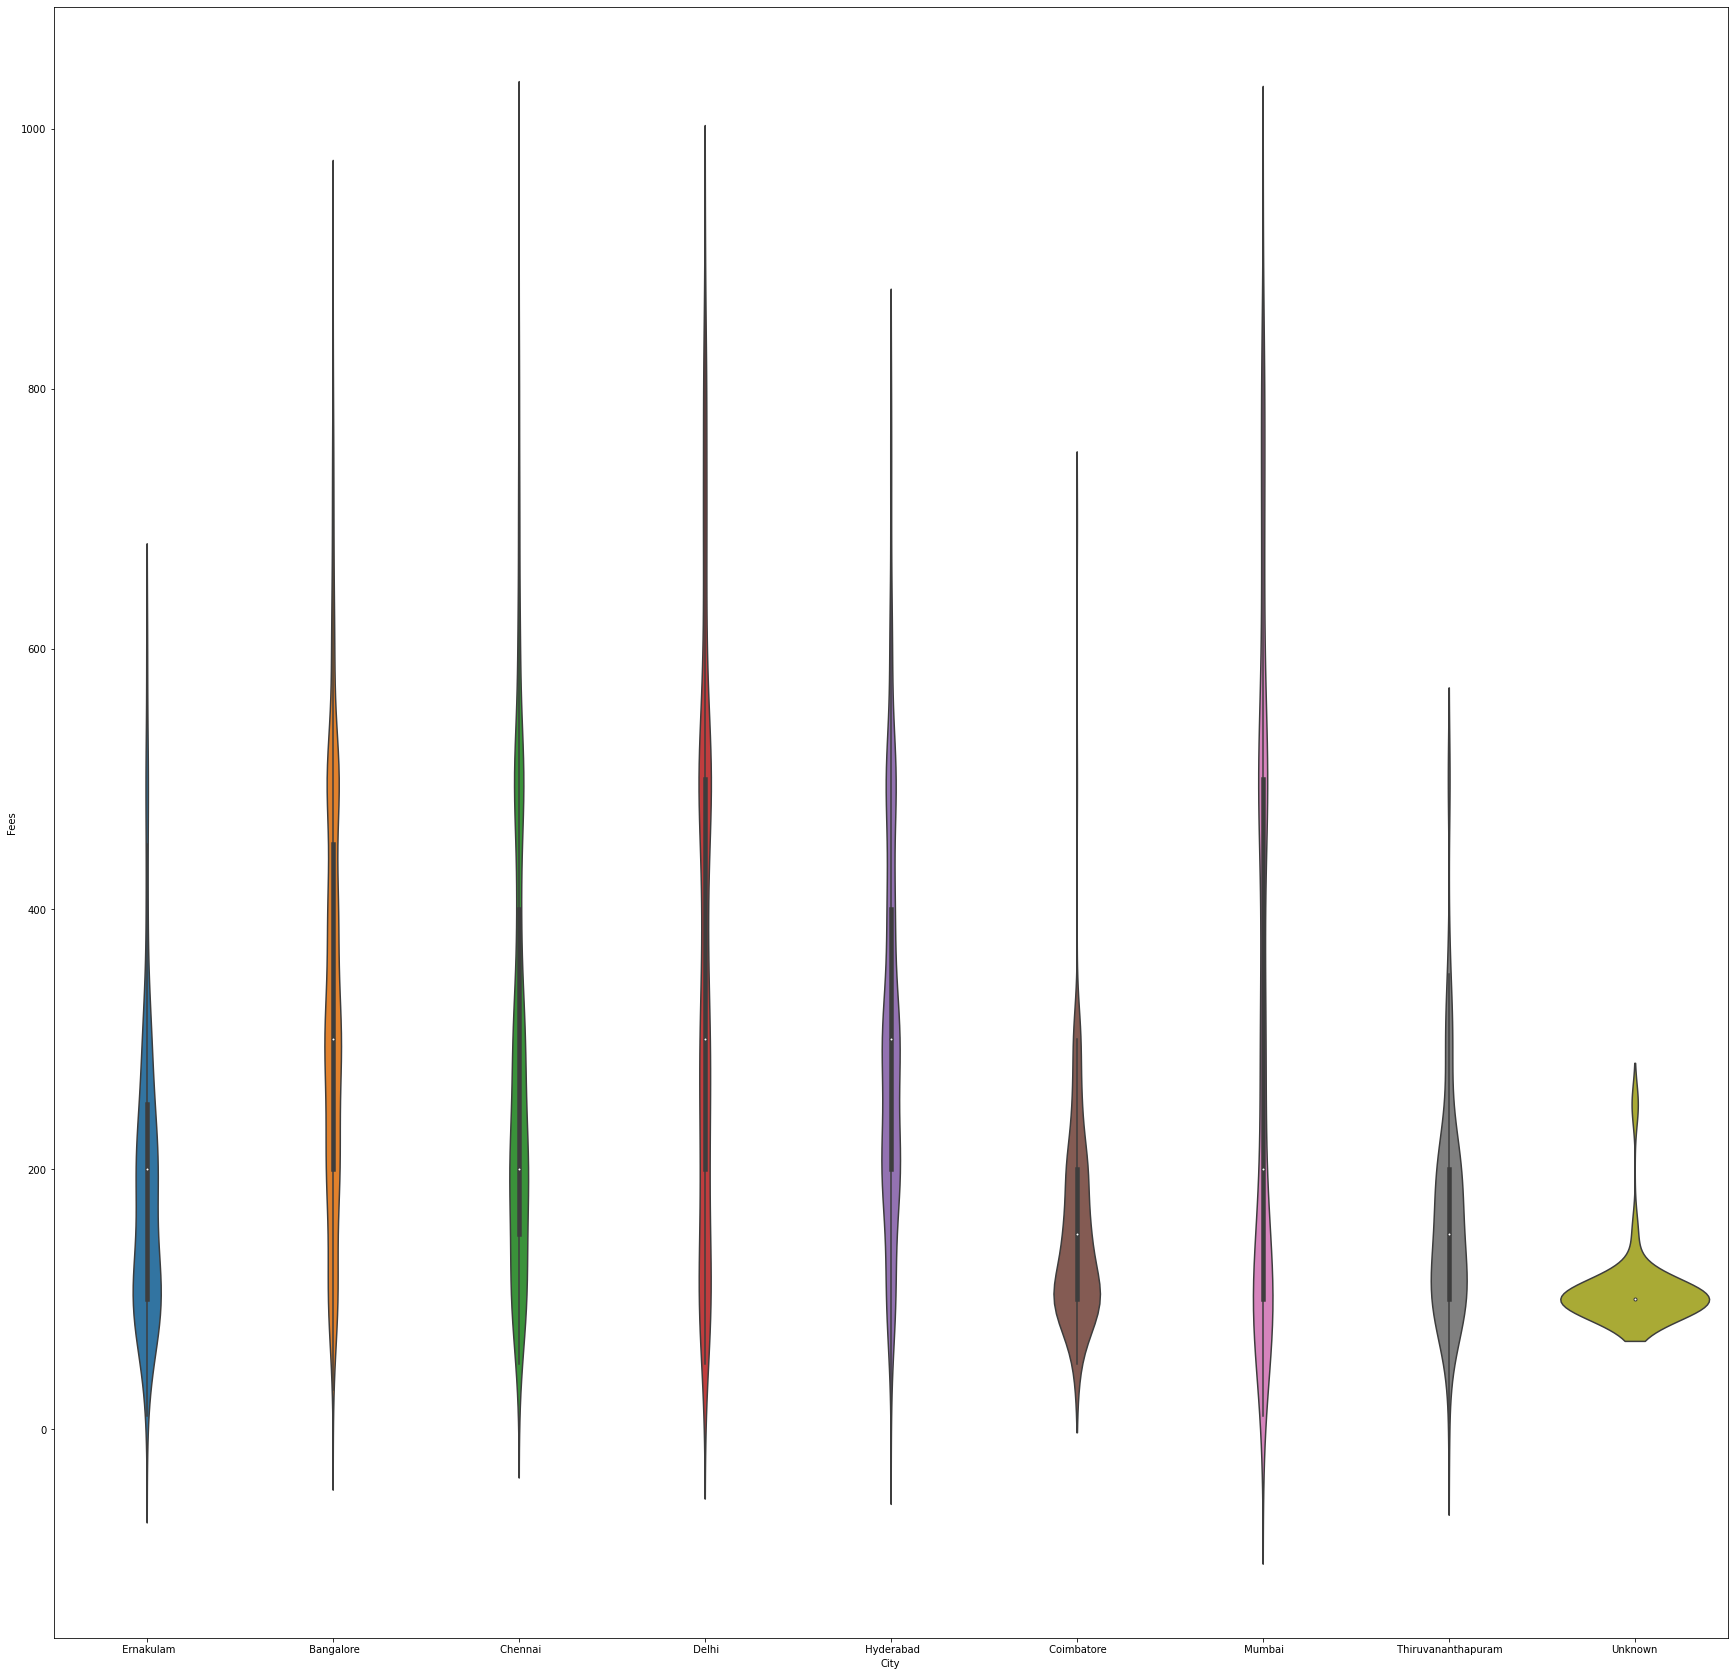

In [580]:
plt.figure(figsize=(30,30))
sns.violinplot(x='City', y='Fees', data= df)

Observations: Fees distribution is almost same and high in metro cities like Bangalore, Chennai, Delhi, Hyderabad, Mumbai.

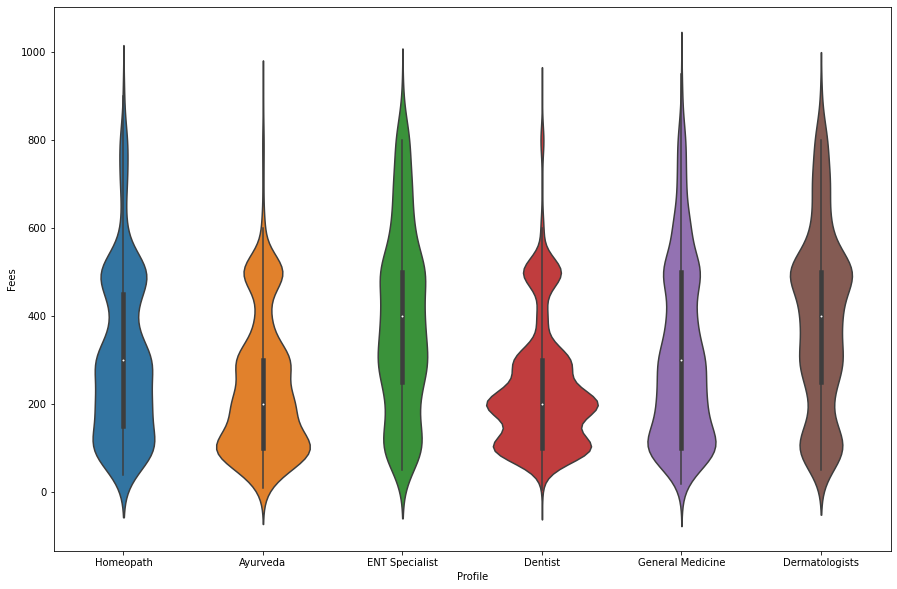

In [581]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Profile', y='Fees', data= df)

Observations: Almost same fees distribution is for Profiles ENT Specialist, General Medicine, Dematologists upto 900. Where as Dentist and Ayurveda fees distributed from upto 600 only.

Observations: Doctors with experience of 30 to 35 and 50 to 55 charging more fees. 

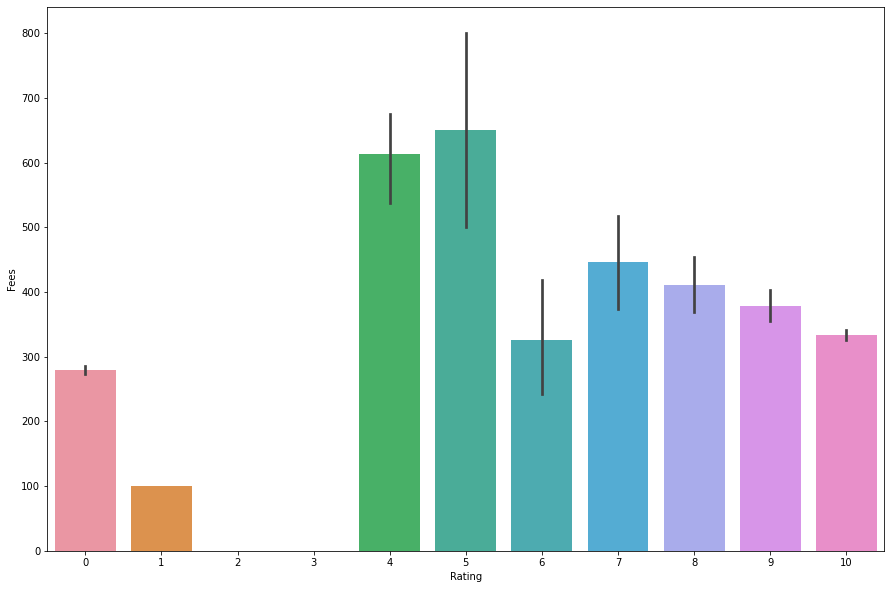

In [582]:
plt.figure(figsize=(15,10))
sns.barplot(x='Rating', y='Fees', data=df)

Observations: Doctors whose ratings are 5 i.e. 50% to 60% are charging more fees where as doctors with ratings of 1 i.e. 0% to 10% are charging less fees.

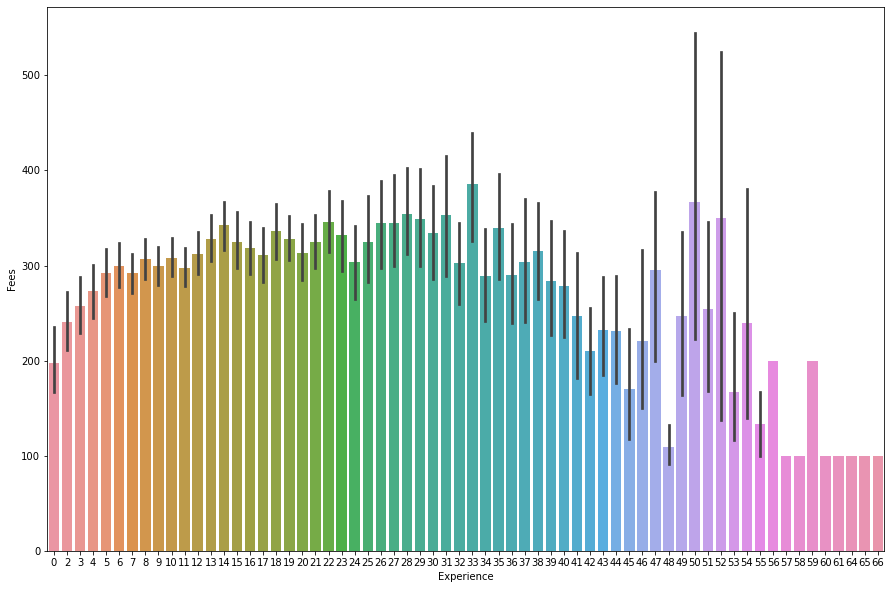

In [583]:
plt.figure(figsize=(15,10))
sns.barplot(x='Experience', y='Fees', data=df)

Observations: Doctors with experience of 33 and 50 charging more fees. Where as Doctors with experience from 60 to 66 are charging less fees. Also as experince increased, along whith this rate of fees also increases upto experience of 33.

In [584]:
df.dtypes

Experience       int64
Rating        category
Place           object
Profile         object
Fees             int64
City            object
dtype: object

In [585]:
df['Rating']= df['Rating'].astype('int')

In [586]:
df.dtypes

Experience     int64
Rating         int32
Place         object
Profile       object
Fees           int64
City          object
dtype: object

In [587]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [588]:
#Splitting of Data
x= df.drop('Fees', axis=1)
x

,Experience,Rating,Place,Profile,City
0,24,10,Kakkanad,Homeopath,Ernakulam
1,12,10,Whitefield,Ayurveda,Bangalore
2,9,0,Mathikere - BEL,ENT Specialist,Bangalore
3,12,0,Bannerghatta Road,Ayurveda,Bangalore
4,20,10,Keelkattalai,Ayurveda,Chennai
...,...,...,...,...,...
5956,19,10,Basavanagudi,ENT Specialist,Bangalore
5957,33,0,Nungambakkam,General Medicine,Chennai
5958,41,10,Greater Kailash Part 2,General Medicine,Delhi
5959,15,9,Vileparle West,General Medicine,Mumbai


In [589]:
y= df['Fees']
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [590]:
#Encoding

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

for i in x.columns:
    if x[i].dtypes== 'object':
        x[i]= enc.fit_transform(x[i].values.reshape(-1,1))
x

,Experience,Rating,Place,Profile,City
0,24,10,296.0,5.0,4.0
1,12,10,856.0,0.0,0.0
2,9,0,452.0,3.0,0.0
3,12,0,68.0,0.0,0.0
4,20,10,335.0,0.0,1.0
...,...,...,...,...,...
5956,19,10,70.0,3.0,0.0
5957,33,0,535.0,4.0,1.0
5958,41,10,215.0,4.0,3.0
5959,15,9,841.0,4.0,6.0


In [591]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(data= scaled_x, columns= x.columns)
new_x

,Experience,Rating,Place,Profile,City
0,0.600979,1.162706,-0.455031,1.543016,0.397991
1,-0.476040,1.162706,1.730781,-1.472893,-1.331496
2,-0.745295,-0.892962,0.153874,0.336652,-1.331496
3,-0.476040,-0.892962,-1.344969,-1.472893,-1.331496
4,0.241972,1.162706,-0.302805,-1.472893,-0.899125
...,...,...,...,...,...
5956,0.152221,1.162706,-1.337162,0.336652,-1.331496
5957,1.408743,-0.892962,0.477842,0.939834,-0.899125
5958,2.126756,1.162706,-0.771193,0.939834,-0.034381
5959,-0.206786,0.957139,1.672232,0.939834,1.262735


In [592]:
x= new_x
x.shape

(5961, 5)

In [593]:
y.shape

(5961,)

In [594]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [595]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=i)
    lm= LinearRegression()
    lm.fit(x_train, y_train)
    pred_lm= lm.predict(x_test)
    acc= r2_score(y_test, pred_lm)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.08533754487159584
673


In [596]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=673)

In [597]:
lm= LinearRegression()
ls= Lasso()
rd= Ridge()
enr= ElasticNet()
svr= SVR()
ad= AdaBoostRegressor()
rf= RandomForestRegressor()

models= [lm, ls, rd, enr, svr, ad, rf]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.06929633730182294

Lasso() - R2_Score
0.06857746130350484

Ridge() - R2_Score
0.06929144042524527

ElasticNet() - R2_Score
0.05528698741227078

SVR() - R2_Score
0.049942848678513285

AdaBoostRegressor() - R2_Score
0.11198733775831116

RandomForestRegressor() - R2_Score
0.1529464164045531



In [598]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.053021260488601785
CV score of  Lasso() 0.05289386948777386
CV score of  Ridge() 0.053021945307102095
CV score of  ElasticNet() 0.04605611228545718
CV score of  SVR() 0.040141864659145224
CV score of  AdaBoostRegressor() 0.1054485516544044
CV score of  RandomForestRegressor() 0.1472109560956843


Observations: From above we can observe that for SVR model there is less difference in r2_score and cross validation r2_score so we will select SVR model for final predictions.

In [599]:
#Hyperparameter Tuning for Best selected model SVR

from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"], 'gamma': ["scale", "auto"]}

GSV= GridSearchCV(svr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [600]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.09732112736141663
Mean absolute error: 140.87536362594037
Mean squared error:  32356.827822624087
Root mean squared error:  179.88003730993634


In [601]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'doctor_fees_best_svr_model.obj')

['doctor_fees_best_svr_model.obj']

# Working With Test Data

In [602]:
#Import Dataset
ds= pd.read_excel('Doctor_Fees_Final_Test.xlsx')
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [603]:
df= pd.DataFrame(data=ds)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [604]:
df.shape

(1987, 6)

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [606]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [607]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [608]:
#Checking for Null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Observations: Null values are present in columns Rating, place and Miscellaneous_Info. 

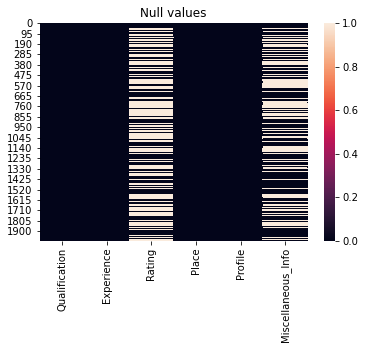

In [609]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Observations: Null values are present in columns Rating, place and Miscellaneous_Info.

In [610]:
#Splitting Experience column

df['Experience'] = df.Experience.str.split(" ",expand=True,)
df['Experience']= pd.to_numeric(df['Experience'])
df['Experience']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: int64

In [611]:
print(df['Experience'].dtype)

int64


In [612]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [613]:
df['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [614]:
df['Qualification'].value_counts()

BAMS                                                                                                      153
BHMS                                                                                                      150
BDS                                                                                                       144
MBBS                                                                                                      107
MBBS, MD - Dermatology                                                                                     64
                                                                                                         ... 
MBBS, Postgraduate Diploma Clinical Cardiology (PGDCC), PG Diploma in Human Rights                          1
BDS, Certification in Clear Aligners, MDS - Orthodontics                                                    1
DDVL, MD - Dermatology , Venereology & Leprosy                                                              1
MBBS, Dipl

In [615]:
# Extract cities

df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [616]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,MBBS,35,NaN,Ghatkopar East,General Medicine,NaN,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,West Marredpally,ENT Specialist,NaN,Hyderabad
2,"MBBS, DDVL",40,70%,KK Nagar,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,BAMS,0,NaN,New Ashok Nagar,Ayurveda,NaN,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Kanakpura Road,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore


In [617]:
# Dealing with  Rating Column
# Replace Nan by -99%,

df['Rating'].fillna('-99%', inplace=True)

In [618]:
# Set dtype to int 

df['Rating']= df['Rating'].str[:-1].astype('int')

In [619]:
#Grouping in bins

bins= [-99,0,10,20,30,40,50,60,70,80,90,100]
labels= [i for i in range(11)]

df['Rating']= pd.cut(df['Rating'], bins= bins, labels= labels, include_lowest=True)
df['Rating'].value_counts().sort_index()

0     1090
1        0
2        0
3        0
4        0
5        0
6        9
7       14
8       27
9      108
10     739
Name: Rating, dtype: int64

In [620]:
#Will drop Qualification as its Profile decide's doctor's identity and we are not getting proper info

df.drop(["Qualification", 'Miscellaneous_Info'],axis=1,inplace=True)

In [621]:
df.head()

,Experience,Rating,Place,Profile,City
0,35,0,Ghatkopar East,General Medicine,Mumbai
1,31,0,West Marredpally,ENT Specialist,Hyderabad
2,40,7,KK Nagar,Dermatologists,Chennai
3,0,0,New Ashok Nagar,Ayurveda,Delhi
4,16,10,Kanakpura Road,Dentist,Bangalore


# EDA

In [622]:
df['Place'].value_counts()

Mulund West       27
Andheri West      27
Dwarka            26
Whitefield        23
HSR Layout        22
                  ..
Cuffe Parade       1
Jakkur             1
Uppilipalayam      1
Kailash Colony     1
Sriniwaspuri       1
Name: Place, Length: 590, dtype: int64

In [623]:
df['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [624]:
df['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [625]:
df['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [626]:
df.dtypes

Experience       int64
Rating        category
Place           object
Profile         object
City            object
dtype: object

In [627]:
df['Rating']= df['Rating'].astype('int')

In [628]:
df.dtypes

Experience     int64
Rating         int32
Place         object
Profile       object
City          object
dtype: object

In [629]:
#Encoding

x= df
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

for i in x.columns:
    if x[i].dtypes== 'object':
        x[i]= enc.fit_transform(x[i].values.reshape(-1,1))
x

,Experience,Rating,Place,Profile,City
0,35,0,142.0,4.0,6.0
1,31,0,578.0,3.0,5.0
2,40,7,212.0,2.0,1.0
3,0,0,373.0,0.0,3.0
4,16,10,231.0,1.0,0.0
...,...,...,...,...,...
1982,10,0,58.0,0.0,0.0
1983,4,0,96.0,2.0,1.0
1984,9,0,423.0,4.0,1.0
1985,12,10,26.0,1.0,0.0


In [630]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(data= scaled_x, columns= x.columns)
new_x

,Experience,Rating,Place,Profile,City
0,1.506992,-0.903081,-0.852573,0.901673,1.301192
1,1.155001,-0.903081,1.661172,0.297007,0.861935
2,1.946982,0.535745,-0.448990,-0.307658,-0.895094
3,-1.572935,-0.903081,0.479251,-1.516990,-0.016580
4,-0.164968,1.152385,-0.339446,-0.912324,-1.334352
...,...,...,...,...,...
1982,-0.692956,-0.903081,-1.336873,-1.516990,-1.334352
1983,-1.220944,-0.903081,-1.117785,-0.307658,-0.895094
1984,-0.780954,-0.903081,0.767524,0.901673,-0.895094
1985,-0.516960,1.152385,-1.521368,-0.912324,-1.334352


In [631]:
x= new_x
x.shape

(1987, 5)

In [632]:
#Loading the Best Model

new_data= joblib.load('doctor_fees_best_svr_model.obj')
pred_test= new_data.predict(new_x)
pred_test

array([242.10924365, 220.14271423, 334.70980943, ..., 274.6071315 ,
       260.98012327, 262.63952149])

In [633]:
pred_test[0]

242.1092436450961

In [634]:
pred_test[1986]

262.63952149134997

Conclusion: For Analysis of Doctor_Consultation_Fees_Project  we have selected SupportVectorRegressor model.